## Esame di Metodi Numerici 6 Maggio 2024 

## Esercizo 1
- Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``'test_14_09_2023.mat'``.  Risolvere il sistema confrontando almeno due tra i metodi  visti  per utilizzare per risolvere il sistema lineare con tale matrice dei coefficienti. Confrontare i risultati dei vari metodi, e giustificare i loro comportamento utilizzando i risultati teorici visti a lezione.
- 
Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_06_05_2024.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


                                       [10 punti]
                                         


In [252]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
dati = loadmat('test_06_05_2024.mat')
A=dati['A']
A=A.astype(float)
b=dati['b']
b=b.astype(float)

In [253]:
def condizionamento(A):
    cond = np.linalg.cond(A)
    if cond <= 10**2:
        print('La matrice è ben condizionata')
    elif cond >10**2 and cond <10**4:
        print('La matrice è mediamente condizionata')
    else:
        print('La matrice è mal condizionata')
    return cond

def simmetrica(A):
    flag = A.T==A
    if np.all(flag):
        print("simmetrica")
        return True
    
    print("non simmetrica")
    return False

def defPos(A):
    autoVal,autoVet = np.linalg.eig(A)
    if np.all(autoVal>0):
        print("definita positiva")
    else:
        print("non definita positiva")
        
def condesaOrSparsa(A):
    non_zeri = np.count_nonzero(A)
    perc = non_zeri/(A.shape[0]*A.shape[1]) * 100
    print("percentuale di valori non zeri => ",perc,"%")
    if perc <= 33:
        print("matrice sparsa")
    else :
        print("matrice densa")

def showSize(A):
    if min(A.shape[0],A.shape[1]) >= 200:
        print("matrice di grandi dimensioni")
    else:
        print("matrice di piccole dimensioni")
        
def checkStrettamenteDiagonaleDominante(A):
    if np.all(np.diag(A)>np.abs(A-np.diag(A))):
        print("diagonale strettamente dominante")
        return
    print("diagonale non strettamente dominante")
    return
    
    
def getInfo(A):
    showSize(A)
    print(A.shape[0] ,A.shape[1])
    if A.shape[0] == A.shape[1]:
        print("quadrata")
    condesaOrSparsa(A)
    condizionamento(A)
    if simmetrica(A):
        defPos(A)
    checkStrettamenteDiagonaleDominante(A)
getInfo(A)

matrice di grandi dimensioni
400 400
quadrata
percentuale di valori non zeri =>  1.2449999999999999 %
matrice sparsa
La matrice è ben condizionata
simmetrica
definita positiva
diagonale non strettamente dominante


Come visto sopra, la matrice è di grandi dimensioni, quadrata, sparsa , simmetrica e definita positiva => quindi posso utilizzare i seguenti metodi:
- Steepest Descent
- Conjugate Gradient
- Gauss-Seidel 
- Gauss-Seidel SOR 

Per avere un confronto netto scelgo di applicare Gauss-Seidel e Steepest Descent.

In [254]:
import SolveTriangular as sl

def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F
    T=np.dot(np.linalg.inv(M),N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp=b-F@x0
        x,flag=sl.Lsolve(M,temp)  #Calcolare la soluzione al passo k equivale a calcolare la soluzione del sistema triangolare con matrice M=D+E
                               # e termine noto b-F@x0
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p =  -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<=itmax and errore>=tol:
        it=it+1
        Ap= A@p
       
        alpha = -np.dot(r.T,p)/np.dot(p.T,Ap)
                
        x =  x+alpha*p
        
         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r
        
     
    return x,vet_r,vec_sol,it

raggio spettrale Gauss-Seidel  0.7976726500691379


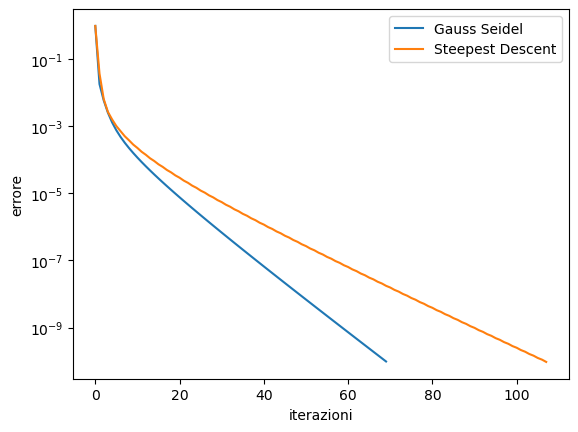

iterazioni Gauss: 70
iterazioni Steepest: 107


In [255]:
import matplotlib.pyplot as plt

n=A.shape[0]
x0=np.zeros(A.shape[0]).reshape(n,1)
tol = 1e-10
itMax=5000
xG,itG,er_vetG = gauss_seidel(A,b,x0,tol,itMax)
x,vet_r,vec_sol,it = steepestdescent(A,b,x0,itMax,tol)

plt.semilogy(range(itG),er_vetG,range(it+1),vet_r)
plt.legend(["Gauss Seidel","Steepest Descent"])
plt.xlabel("iterazioni")
plt.ylabel("errore")
plt.show()
print("iterazioni Gauss:",itG)
print("iterazioni Steepest:",it)


## Osservazioni ## 
Il metodo di gauss-seindel converge più velocemente alla soluzione. rispetto a Steepest Descent, questo si può verificare quando:
- La matrice è strettamente a diagonale dominante
#### OPPURE #### 
- la matrice è ben condizionata 

Nel nostro caso la matrice A è ben condizionata e non è strettamente a diagonale dominante.
Inoltre il fatto che Steepest Descent ci metta più iterazioni può essere dovuto dal fatto che la matrice A abbia dei autovalori molto diversi tra loro, essendo che il metodo si basa sul seguire l'autovalore più grande per convergere alla soluzione.   

- Data la matrice 
$$A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],$$
Richiamare le ipotesi sotto cui esiste la fattorizzazione di Gauss senza pivoting e scrivere un codice per  verificarle.

                                                [2 punti]

### Condizioni ###
- La matrice A è quadrata
- La matrice A non deve avere nessuna sotto matrice principale con determinante = 0

In [256]:
def checkGauss(A):
    if A.shape[0] != A.shape[1]:
        return False
    
    for i in range(A.shape[0]+1):
        matrix = A[:i,:i]
        
        if np.linalg.det(matrix) == 0:
            return False
    
    return True

## Esercizio 2
Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange, $n=5,10,15,18$

- nodi $x_i$, punti equidistanti in un intervallo $[a, b]$,
- nodi $x_i$, zeri dei polinomi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ della funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. 
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).
  
                                          [6] punti

- Calcolare l'errore di interpolazione $r(x) =  f(x)-pe(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $pe(x)$ calcolato a partire da nodi equdisitanti.
                                        [1] punto
                                        
Visualizzare il grafico di $f(x)$ e $pe(x)$, ed il grafico di $|r(x)|$ per ogni valore $n=5,10,15,18$ 

                                        [1] punto
                                        
Calcolare l'errore di interpolazione $r(x) =  f(x)-pc(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$ calcolato a partire da nodi di Chebichev.

                                      [1] punto
                                            
Visualizzare il grafico di $f(x)$ e $pc(x)$, ed il grafico di $|r(x)|$. 

                                       [1] punto

Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$? Scrivere la formula dell'errore che si compie quando al posto della funzione che ha generato i dati si considera il polinomio interpolatore di grado n e commentarla.
                                         
                                         [3 punti]

In [257]:
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del j-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num=np.poly(xzeri)
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    
    return p

def InterpL(x, y, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx)
    
    
     return L@y

def chebyshev_zeros(n):
   # Calcola gli zeri del polinomio di Chebyshev di primo tipo T_n(x)
   k = np.arange(1, n + 1)
   zeros = np.cos((2 * k - 1) * np.pi / (2 * n))
   return zeros

def xi(a,b,i,n):
   num = (2*i+1)*np.pi
   den = 2*(n+1)
   return ((a+b)/2)+((b-a)/2)*np.cos(num/den)

def fname(x):
   return 1/(1+25*x**2)

def calcErr(y,pol):
   return y-pol

n =  5


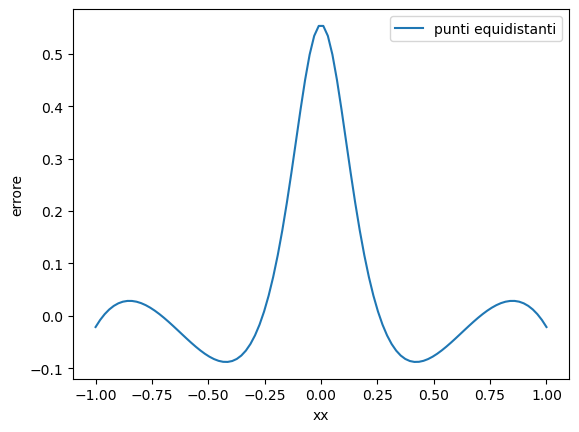

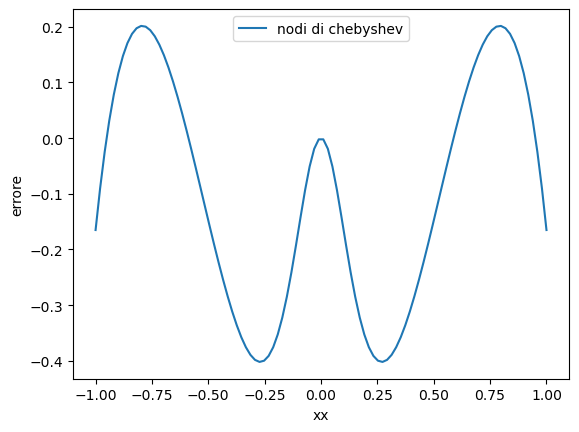

n =  10


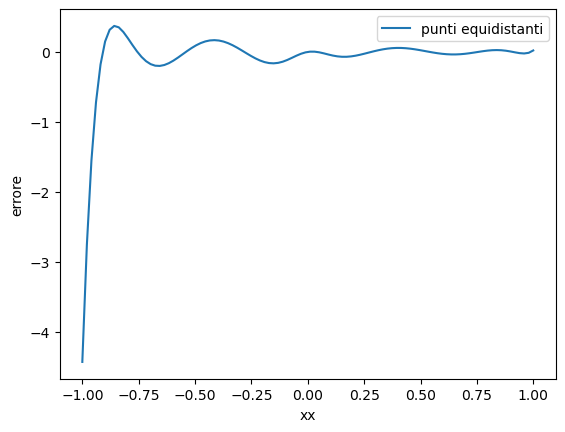

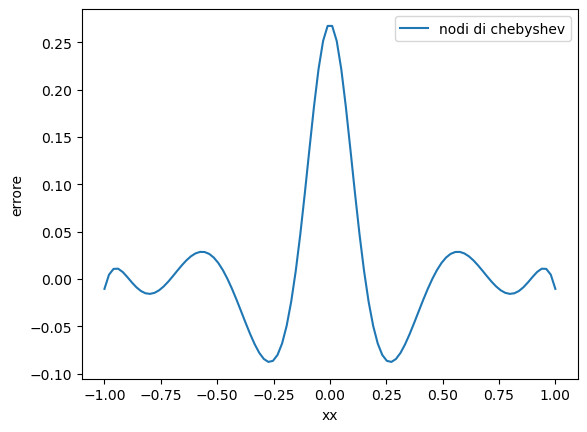

n =  15


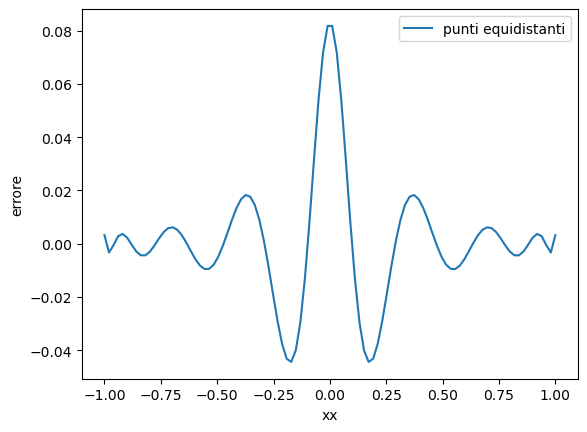

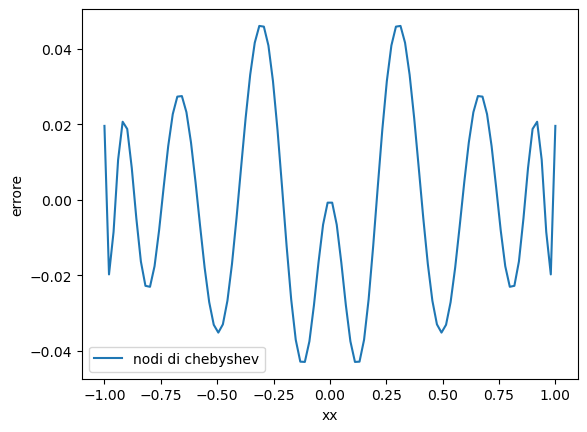

n =  18


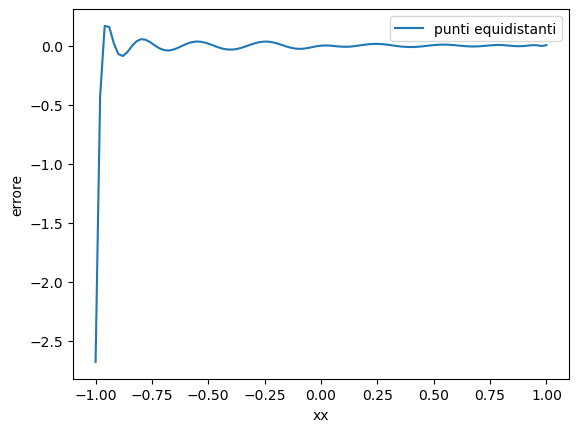

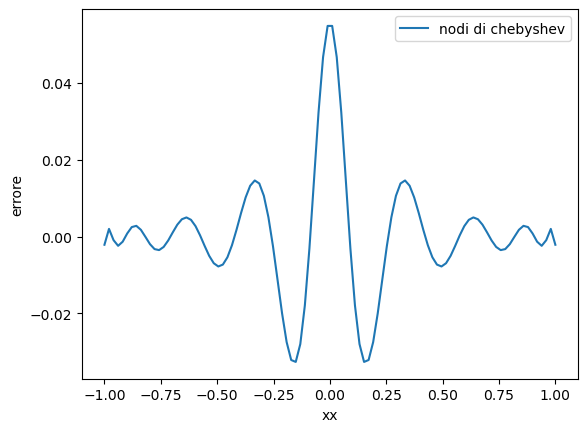

In [261]:
a = -1
b=1
xx = np.linspace(a,b,100)
n = [5,10,15,18]


for i in range(len(n)):
    x1=[]
    x2=[]
    y1=[]
    y2=[]
    for j in range(n[i]):
        x1.append(xi(a,b,j,n[i])) # popolo x
        y1.append(fname(x1[j]))
    x2=chebyshev_zeros(n[i])
    for j in range(len(x2)):
        y2.append(fname(x2[j]))
    pol1 = InterpL(np.array(x1),np.array(y1),xx)
    pol2 = InterpL(np.array(x2),np.array(y2),xx)
    print("n = ",n[i])
    yy=fname(xx)
    r1 = calcErr(yy,pol1)
    plt.plot(xx,r1)
    plt.xlabel("xx")
    plt.ylabel("errore")
    plt.legend(["punti equidistanti"])
    plt.show()
    r2 = calcErr(yy,pol2)
    plt.plot(xx,r2)
    plt.xlabel("xx")
    plt.ylabel("errore")
    plt.legend(["nodi di chebyshev"])
    plt.show()
    


**Domanda AI**

- Descrivere gli elementi caratterizzanti di un MultiLayer Perceptron (MLP).( Com'è fatto un neurone artificiale, a caso servono le funzioni di attivazione, come sono organizzati i neuroni. Varie tipologie di reti MLP)  ed accennare in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**

- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**